# 3. Perceptron in Python

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
#training data gerneration
m = 100
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

g = 0.8*x1 + 2*x2 - 3

In [52]:
#C1 : g>=1 , C0 : g<-1 할당 --> 반드시 Linearly Separable 한 데이터 구조가 됨.
#   Hint : np.where
C1 = np.where(g>=1)[0]
C2 = np.where(g<-1)[0]
print(C1, C2)
type(C1)

[ 0  2  4  5  7 10 11 12 14 18 19 20 22 24 25 26 31 32 39 46 47 50 51 52
 59 60 64 66 67 68 69 73 74 75 76 78 79 81 82 83 88 92 94 97] [ 1  8  9 13 15 16 17 21 23 27 29 30 33 34 35 36 37 40 42 43 44 45 49 53
 54 55 56 57 58 61 65 70 71 72 77 84 85 87 90 91 95 96 98 99]


numpy.ndarray

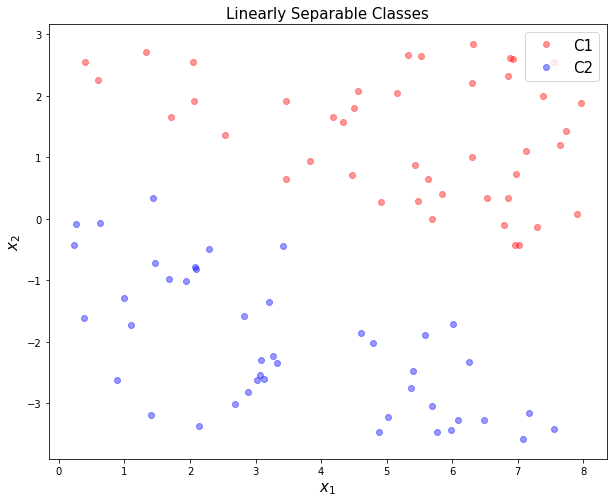

In [53]:
#C1, C2 Plotting with separated color

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1') # g >= 1
plt.plot(x1[C2], x2[C2], 'bo', alpha = 0.4, label = 'C2') # g < -1
plt.title('Linearly Separable Classes', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.show()

In [54]:
# Make X matrix
X1 = np.hstack([np.ones([C1.shape[0], 1]), x1[C1], x2[C1]])
X2 = np.hstack([np.ones([C2.shape[0], 1]), x1[C2], x2[C2]])
X = np.vstack([X1, X2])

# Make y matrix
y = np.vstack([np.ones([C1.shape[0], 1]), -np.ones([C2.shape[0], 1])])
y.shape

(88, 1)

In [62]:
X = np.asmatrix(X)
y = np.asmatrix(y)
y.shape

(88, 1)

In [64]:
# Weight initialization
w = np.ones([3,1])
w = np.asmatrix(w)

# how many iteration?
n_iter = m

for k in range(n_iter):
    for i in range(y.shape[0]):
        if y[i, 0] != np.sign(X[i, :] * w)[0, 0]:
            w += y[i, 0] * X[i, :].T
            
print(w)

[[-9.        ]
 [ 2.73100817]
 [13.29603506]]


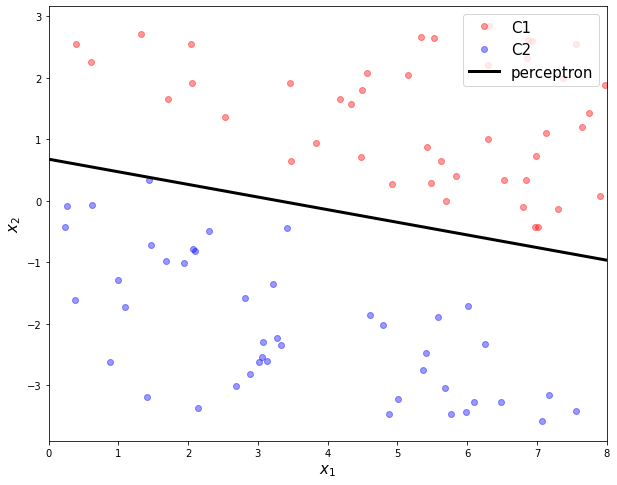

In [65]:
#Draw hyperplane

x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w[1,0] / w[2,0] * x1p - w[0,0] / w[2,0]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C2], x2[C2], 'bo', alpha = 0.4, label = 'C2')
plt.plot(x1p, x2p, c = 'k', linewidth = 3, label = 'perceptron')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.show()

In [66]:
# Make X matrix
X1 = np.hstack([x1[C1], x2[C1]])
X2 = np.hstack([x1[C2], x2[C2]])
X = np.vstack([X1, X2])

# Make y matrix
y = np.vstack([np.ones([C1.shape[0], 1]), -np.ones([C2.shape[0], 1])])

In [72]:
from sklearn import linear_model

clf = linear_model.Perceptron(tol=1e-3)
#Find out weight
clf.fit(X, np.ravel(y))

Perceptron()

In [73]:
# Test with known points. ex) (3,-2), (6,2)

clf.predict([[7, 3]]), clf.predict([[1, 0]])

(array([1.]), array([-1.]))

In [74]:
clf.coef_, clf.intercept_

(array([[ 3.57014722, 20.00440144]]), array([-9.]))

In [75]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0][0]
w2 = clf.coef_[0][1]
w0, w1, w2

(-9.0, 3.5701472206945555, 20.004401438258967)

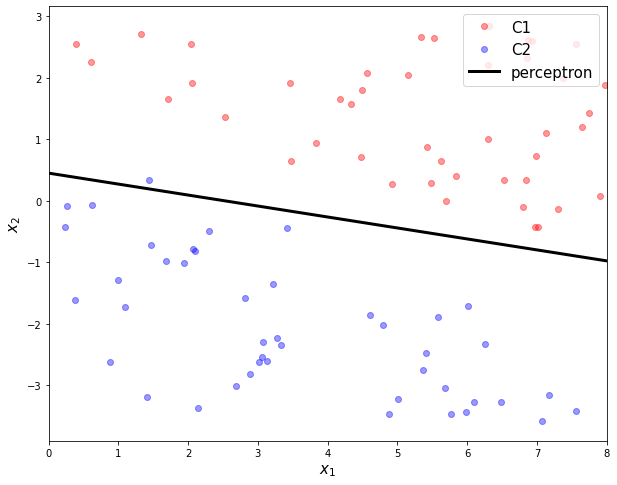

In [78]:
#Draw hyperplane

x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w1 / w2 * x1p - w0 / w2

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C2], x2[C2], 'bo', alpha = 0.4, label = 'C2')
plt.plot(x1p, x2p, c = 'k', linewidth = 3, label = 'perceptron')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.show()